<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/outlier_detection/percentile_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


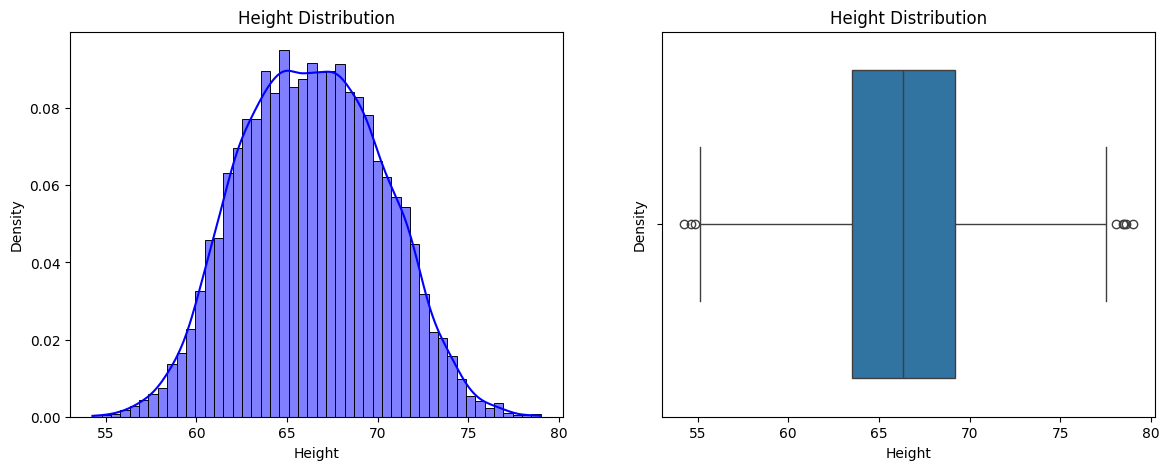

In [17]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(df['Height'],kde=True,stat='density',color='blue')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(1,2,2)
sns.boxplot(x=df['Height'])
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Density')

plt.show()

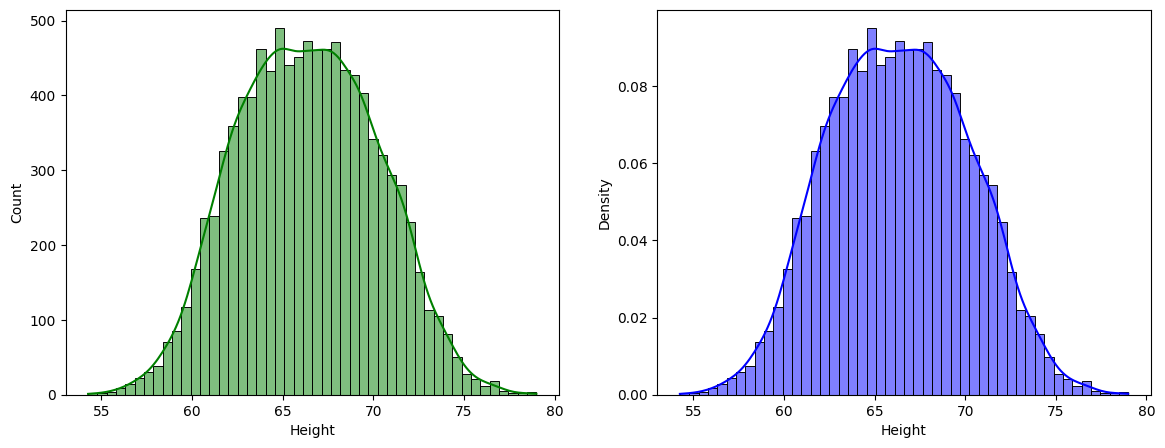

In [12]:
# plt.figure(figsize=(14,5))
# # Count-based histogram
# plt.subplot(1,2,1)
# sns.histplot(df['Height'], kde=True, stat='count', color='green')

# # Density-based histogram
# plt.subplot(1,2,2)
# sns.histplot(df['Height'], kde=True, stat='density', color='blue')

# plt.show()


In [18]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [19]:
upper_limit,lower_limit

(np.float64(74.7857900583366), np.float64(58.13441158671655))

In [20]:
df[(df['Height'] >=74.78) | (df['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [23]:
new_df = df[(df['Height'] <=74.78) & (df['Height'] >= 58.13)]

In [24]:
new_df['Height'].describe()

,Height
count,9799.000000
mean,66.363507
std,3.644267
min,58.134496
25%,63.577147
50%,66.317899
75%,69.119859
max,74.767447


In [25]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


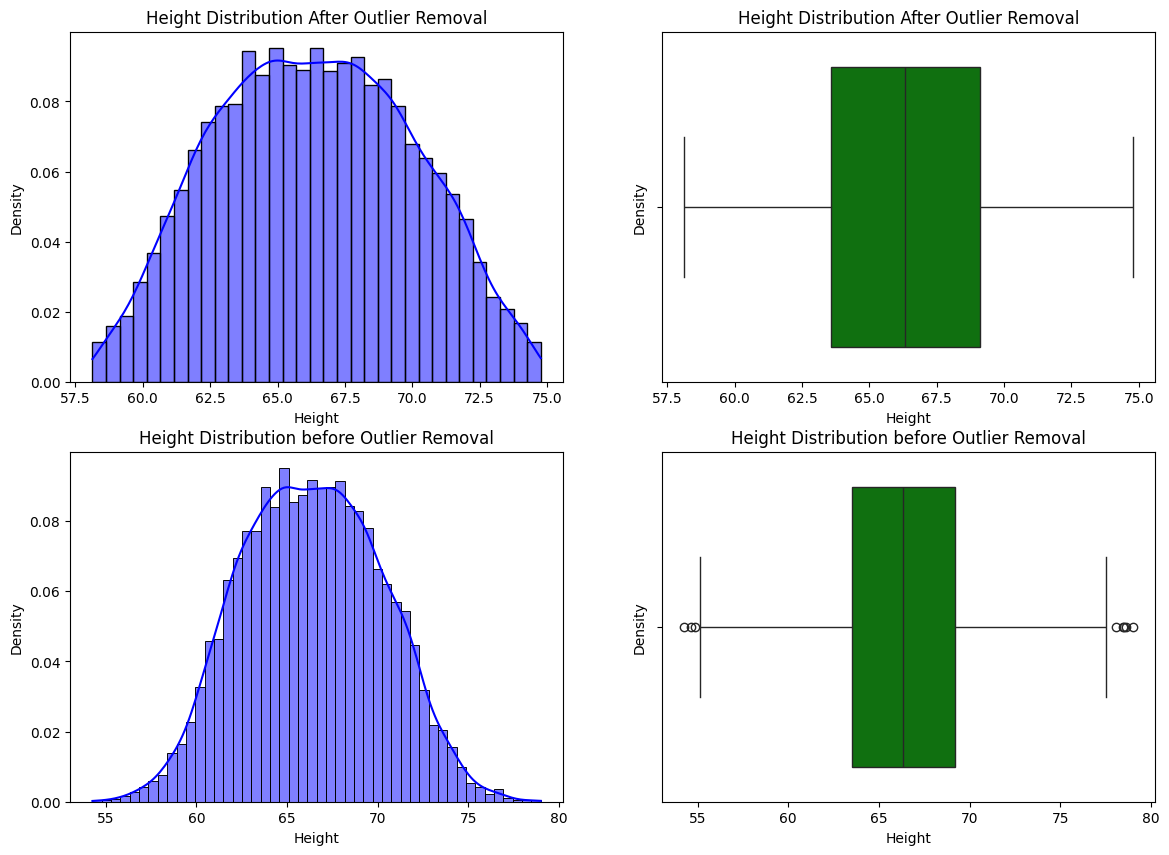

In [33]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.histplot(new_df['Height'],kde=True,stat='density',color='blue')
plt.title('Height Distribution After Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(2,2,2)
sns.boxplot(x=new_df['Height'],color='green')
plt.title('Height Distribution After Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(2,2,3)
sns.histplot(df['Height'],kde=True,stat='density',color='blue')
plt.title('Height Distribution before Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(2,2,4)
sns.boxplot(x=df['Height'],color='green')
plt.title('Height Distribution before Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.show()


# Capping(Winsorization) in Percentile Method

In [28]:
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 74.7857900583366
Lower_limit 58.13441158671655


In [29]:
# Capping --> Winsorization

new_df2 = df.copy()
new_df2['Height'] = np.where(new_df2['Height'] >= upper_limit,
        upper_limit,
        np.where(new_df2['Height'] <= lower_limit,
        lower_limit,
        new_df2['Height']))

In [30]:
df.shape

(10000, 3)

In [32]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


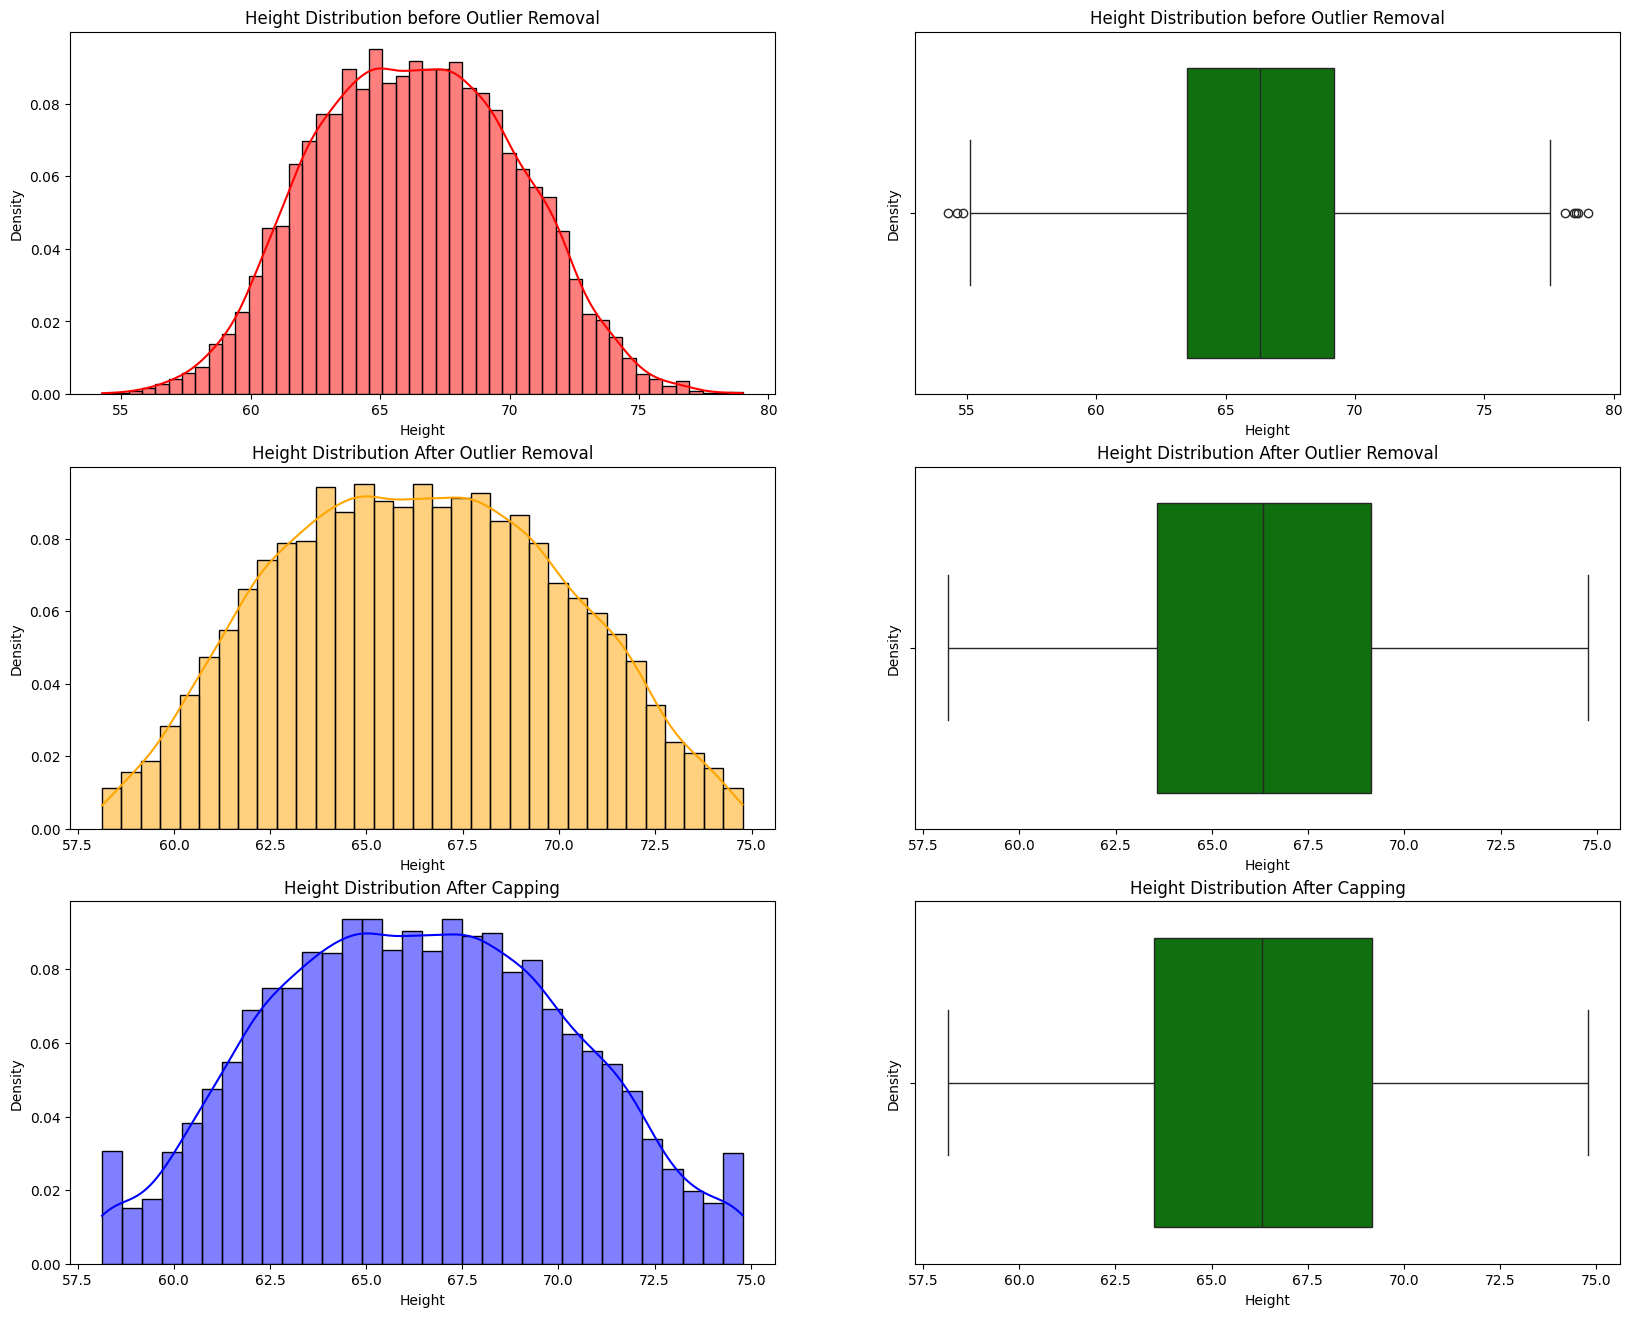

In [39]:
# Comparison No Outlier Removal VS Trimming VS Capping

plt.figure(figsize=(20,16))

plt.subplot(3,2,1)
sns.histplot(df['Height'],kde=True,stat='density',color='red')
plt.title('Height Distribution before Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(3,2,2)
sns.boxplot(x=df['Height'],color='green')
plt.title('Height Distribution before Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')


plt.subplot(3,2,3)
sns.histplot(new_df['Height'],kde=True,stat='density',color='orange')
plt.title('Height Distribution After Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(3,2,4)
sns.boxplot(x=new_df['Height'],color='green')
plt.title('Height Distribution After Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')


plt.subplot(3,2,5)
sns.histplot(new_df2['Height'],kde=True,stat='density',color='blue')
plt.title('Height Distribution After Capping')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(3,2,6)
sns.boxplot(x=new_df2['Height'],color='green')
plt.title('Height Distribution After Capping')
plt.xlabel('Height')
plt.ylabel('Density')

plt.show()

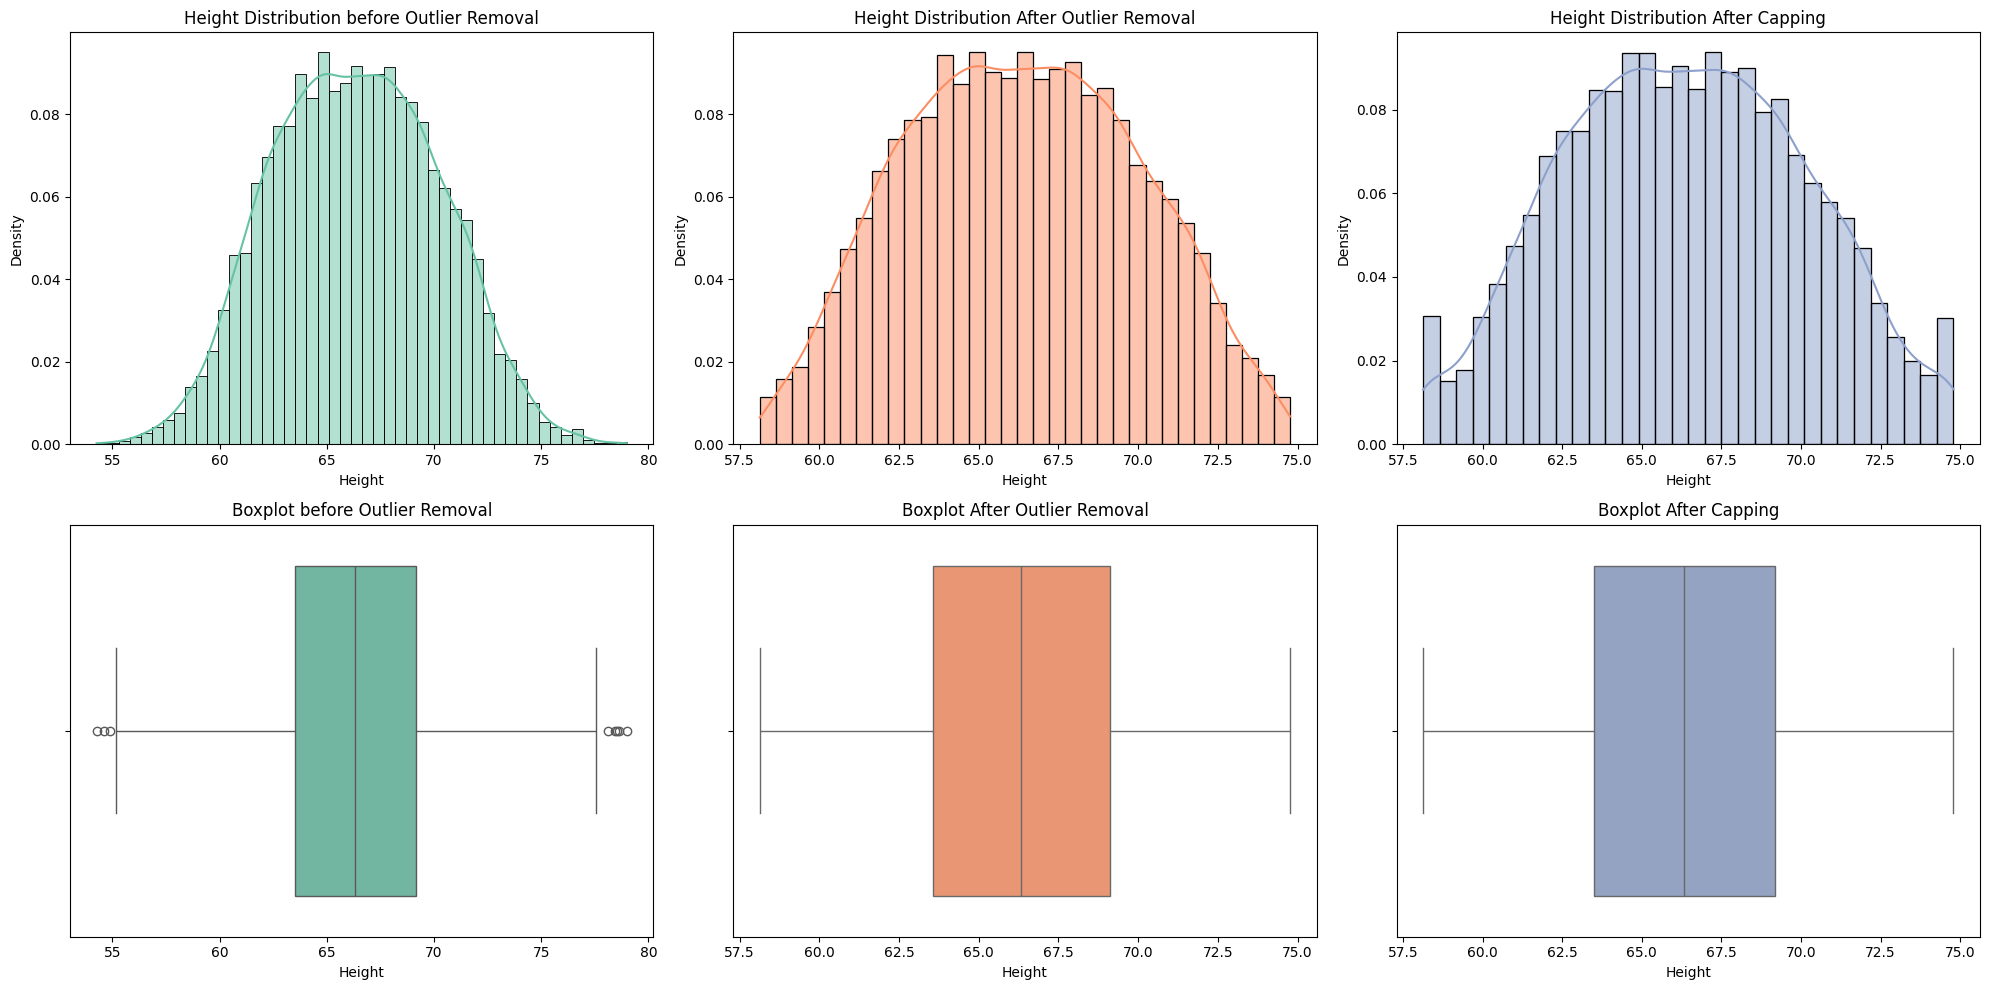

In [41]:

# Define a nice color palette
colors = sns.color_palette("Set2", 3)  # 3 distinct colors

plt.figure(figsize=(20,10))

# Column 1: No Outlier Removal
plt.subplot(2,3,1)
sns.histplot(df['Height'], kde=True, stat='density', color=colors[0])
plt.title('Height Distribution before Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(2,3,4)
sns.boxplot(x=df['Height'], color=colors[0])
plt.title('Boxplot before Outlier Removal')
plt.xlabel('Height')

# Column 2: After Outlier Removal
plt.subplot(2,3,2)
sns.histplot(new_df['Height'], kde=True, stat='density', color=colors[1])
plt.title('Height Distribution After Outlier Removal')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(2,3,5)
sns.boxplot(x=new_df['Height'], color=colors[1])
plt.title('Boxplot After Outlier Removal')
plt.xlabel('Height')

# Column 3: After Capping
plt.subplot(2,3,3)
sns.histplot(new_df2['Height'], kde=True, stat='density', color=colors[2])
plt.title('Height Distribution After Capping')
plt.xlabel('Height')
plt.ylabel('Density')

plt.subplot(2,3,6)
sns.boxplot(x=new_df2['Height'], color=colors[2])
plt.title('Boxplot After Capping')
plt.xlabel('Height')

plt.tight_layout()
plt.show()
